##**LANDSLIDE DETECTION PROJECT**

**Problem Statement: Landslide detection Classification**

Landslides are a recurring natural hazard that pose a significant threat to human life and infrastructure, particularly in mountainous and high rainfall regions. Despite technological advancements, many regions still lack real-time, data-driven systems for predicting and mitigating landslide risks.

This project aims to develop a machine learning model that can classify the level of landslide risk (e.g., No Risk, Low, ModeLrate, High) using environmental features collected over 20 years. These include temperature, humidity, precipitation, soil moisture, and elevation. The objective is to build an accurate and interpretable model that can support early-warning systems and assist government authorities, urban planners, and disaster management teams in proactive decision-making.



🔷
**1. Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Make sure this is imported
import joblib

**🔷 2. Load the Dataset**

In [2]:
# Load the CSV file
data = pd.read_csv('/content/regenerated_landslide_risk_dataset.csv')

# Display first 5 rows
data.head()


,Temperature (°C),Humidity (%),Precipitation (mm),Soil Moisture (%),Elevation (m),Landslide Risk Prediction
0,17,68,176,64,120,Low
1,26,33,65,24,672,Low
2,16,81,56,52,36,Low
3,25,53,136,70,583,Low
4,34,77,23,37,130,Low


**🔷 3. Understand Data Structure**

In [3]:
print("Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())


Shape: (5000, 6)

Columns:
 Index(['Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)',
       'Soil Moisture (%)', 'Elevation (m)', 'Landslide Risk Prediction'],
      dtype='object')

Data Types:
 Temperature (°C)              int64
Humidity (%)                  int64
Precipitation (mm)            int64
Soil Moisture (%)             int64
Elevation (m)                 int64
Landslide Risk Prediction    object
dtype: object

Missing Values:
 Temperature (°C)             0
Humidity (%)                 0
Precipitation (mm)           0
Soil Moisture (%)            0
Elevation (m)                0
Landslide Risk Prediction    0
dtype: int64


**🔷 4. Clean Column Names**

In [4]:

# Clean column names
data.columns = data.columns.str.strip().str.replace(' ', '_')\
    .str.replace('(', '').str.replace(')', '')\
    .str.replace('%', '').str.replace('°C', 'C')\
    .str.replace('mm', 'mm')

# Confirm new column names
print(data.columns.tolist())



['Temperature_C', 'Humidity_', 'Precipitation_mm', 'Soil_Moisture_', 'Elevation_m', 'Landslide_Risk_Prediction']


 **🔷 5.Statistical Summary of Features**

In [7]:
print("\n--- Statistical Summary ---")
# Define the features variable
features = ['Temperature_C', 'Humidity_', 'Precipitation_mm', 'Soil_Moisture_', 'Elevation_m']
print(data[features].describe())


--- Statistical Summary ---
       Temperature_C    Humidity_  Precipitation_mm  Soil_Moisture_  \
count    5000.000000  5000.000000       5000.000000     5000.000000   
mean       24.815800    62.614000        123.126400       54.915800   
std         6.052867    19.108533         72.144734       20.345788   
min        15.000000    30.000000          0.000000       20.000000   
25%        20.000000    46.000000         61.000000       37.000000   
50%        25.000000    63.000000        121.000000       55.000000   
75%        30.000000    79.000000        186.000000       72.250000   
max        35.000000    95.000000        250.000000       90.000000   

       Elevation_m  
count  5000.000000  
mean    503.015800  
std     288.700745  
min       0.000000  
25%     253.000000  
50%     505.000000  
75%     757.000000  
max    1000.000000  


**🔷 6. Split Features and Target**

In [8]:
# Split into features (X) and label (y)
X = data.drop('Landslide_Risk_Prediction', axis=1)
y = data['Landslide_Risk_Prediction']


**🔷 7. Normalize Features**

In [9]:
# Scale features to standard normal distribution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**🔷 8. Train-Test Split**

In [10]:
# Split dataset into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

# Print the shape of splits
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3750, 5)
Test shape: (1250, 5)


**🔷 9. Train the Random Forest Classifier**

In [11]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**🔷 10. Make Predictions**

In [12]:
# Predict on test data
y_pred = model.predict(X_test)


**🔷 11. Evaluate the Model**

In [13]:
# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9976

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.95      0.97        19
         Low       1.00      1.00      1.00      1128
    Moderate       0.99      0.98      0.99       102
   Very High       1.00      1.00      1.00         1

    accuracy                           1.00      1250
   macro avg       1.00      0.98      0.99      1250
weighted avg       1.00      1.00      1.00      1250



**🔷 12. Confusion Matrix**

In [16]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n", cm)
print("Shape:", cm.shape)
print("Unique labels in y_test:", np.unique(y_test))

Confusion matrix:
 [[  18    0    1    0]
 [   0 1128    0    0]
 [   0    2  100    0]
 [   0    0    0    1]]
Shape: (4, 4)
Unique labels in y_test: ['High' 'Low' 'Moderate' 'Very High']


 **🔷13. Confusion Matrix Visualization**

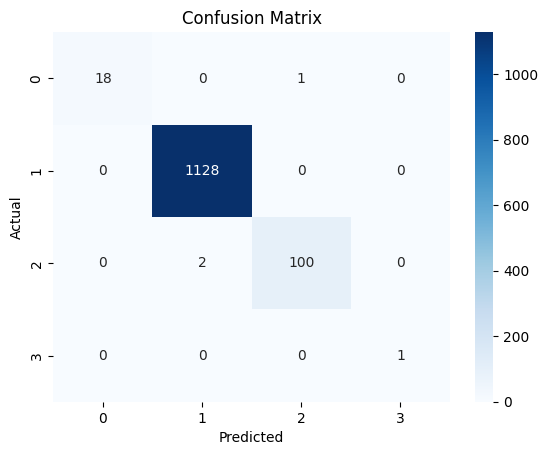

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**🔷 14. Feature Importance**

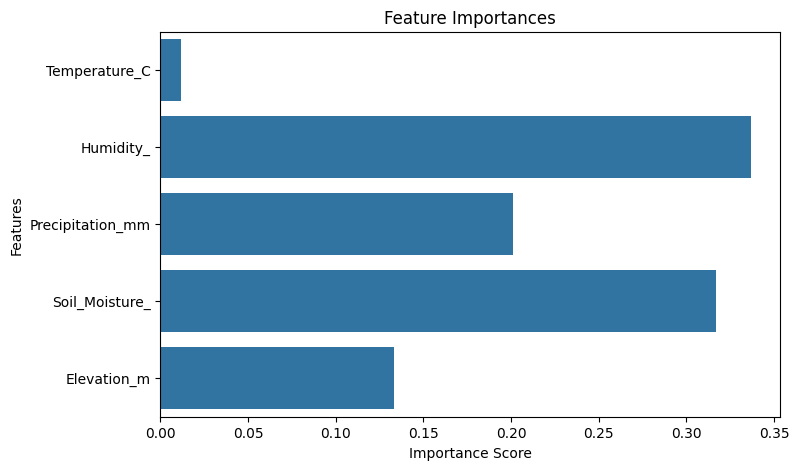

In [18]:
# Show feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


**🔷 15. Data Visualization**

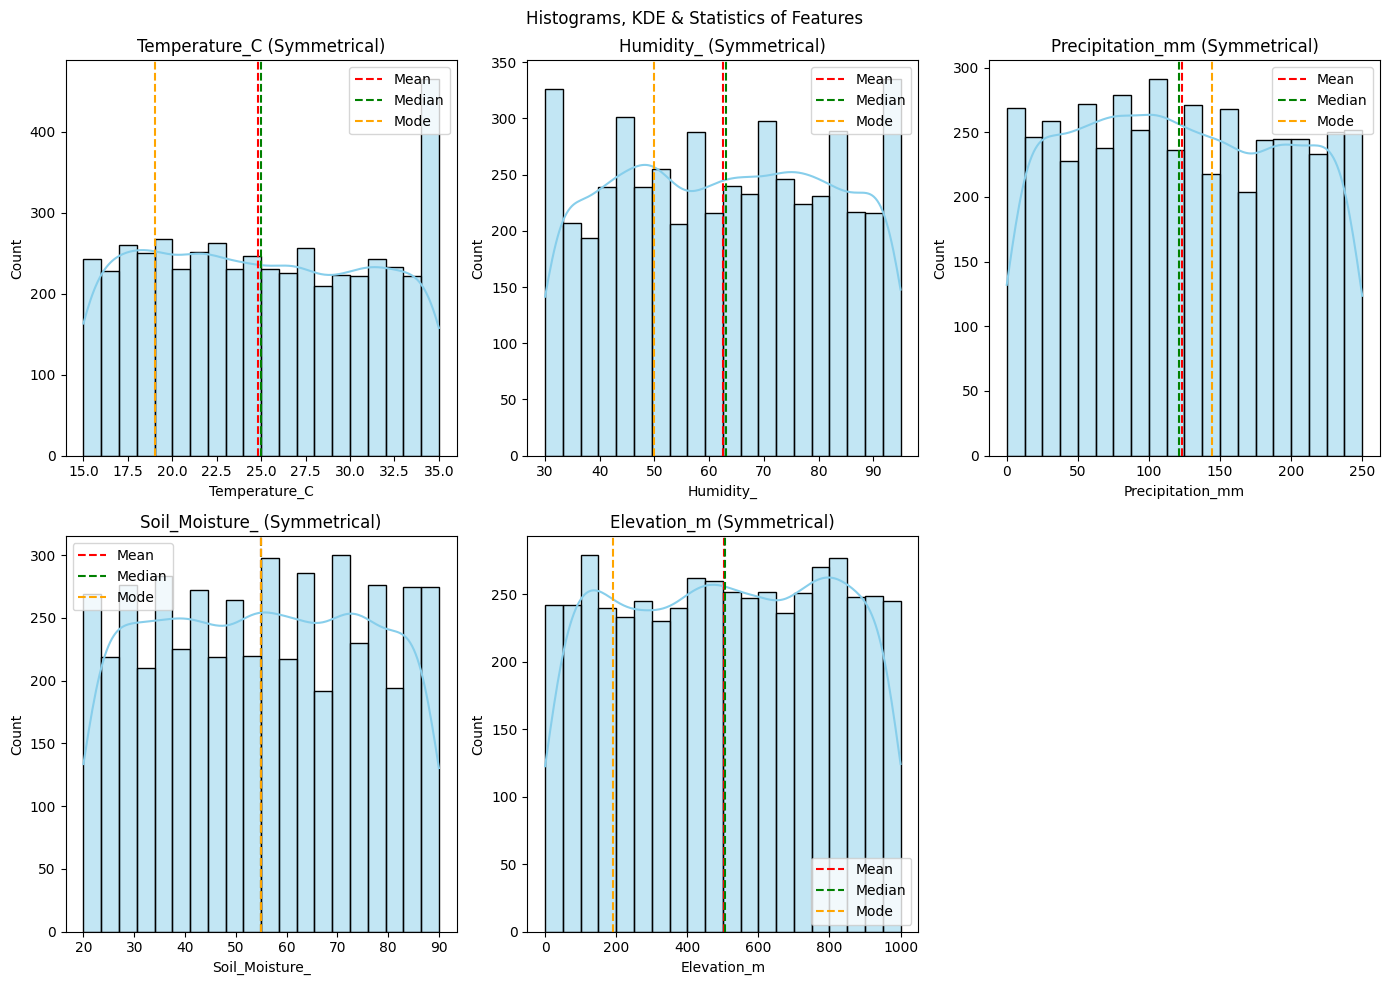

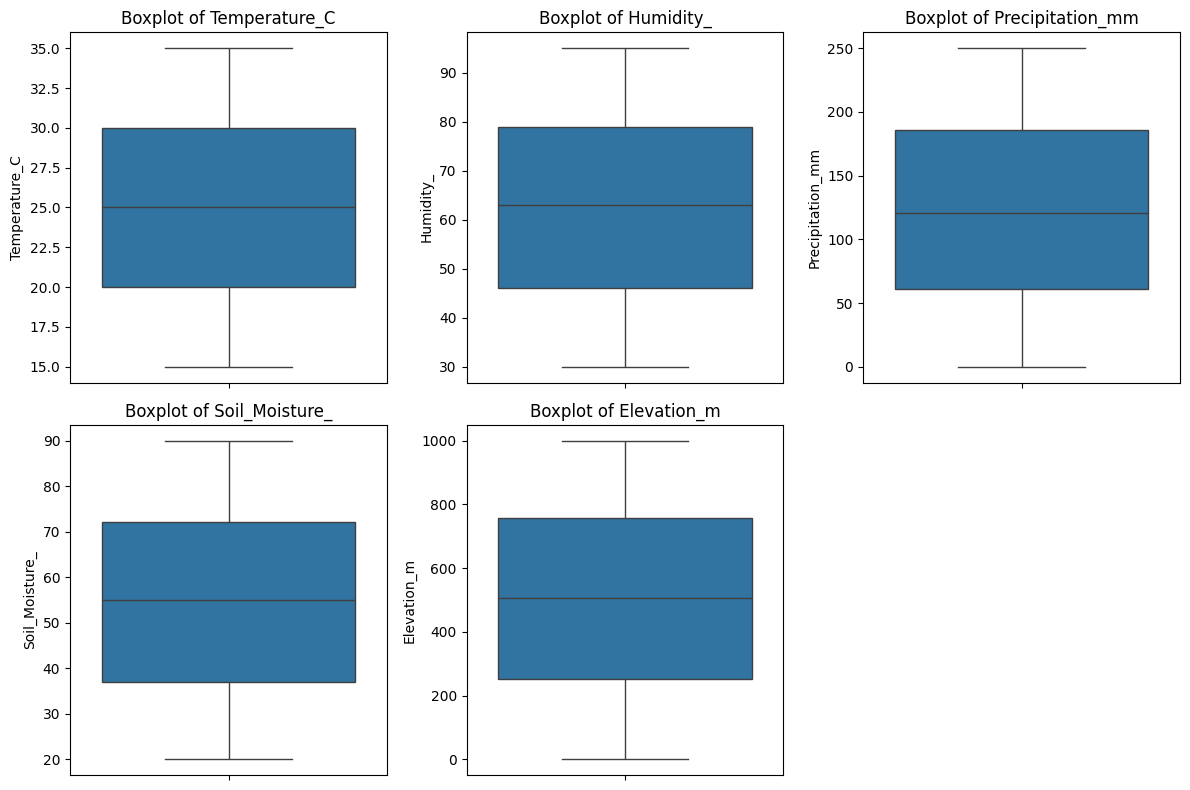

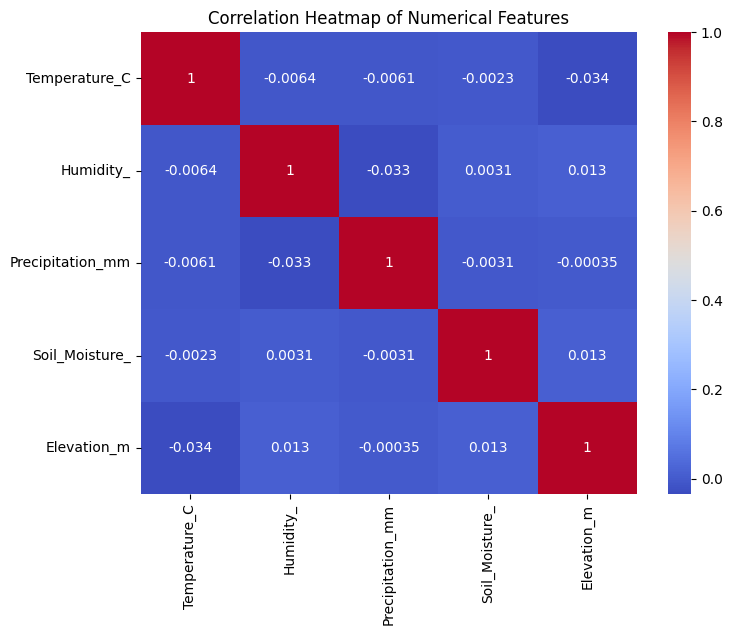

In [19]:
# Histograms with KDE and skewness
features = ['Temperature_C', 'Humidity_', 'Precipitation_mm', 'Soil_Moisture_', 'Elevation_m']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[feature], bins=20, kde=True, color='skyblue')
    skew = data[feature].skew()
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode().values[0]
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.axvline(median, color='green', linestyle='--', label='Median')
    plt.axvline(mode, color='orange', linestyle='--', label='Mode')
    if skew > 0.5:
        skewness = "Positively Skewed"
    elif skew < -0.5:
        skewness = "Negatively Skewed"
    else:
        skewness = "Symmetrical"
    plt.title(f"{feature} ({skewness})")
    plt.legend()
plt.suptitle("Histograms, KDE & Statistics of Features")
plt.tight_layout()
plt.show()


# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Correlation Heatmap (only numerical features)
plt.figure(figsize=(8, 6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**🔷 16. ROC Curve (Multiclass)**

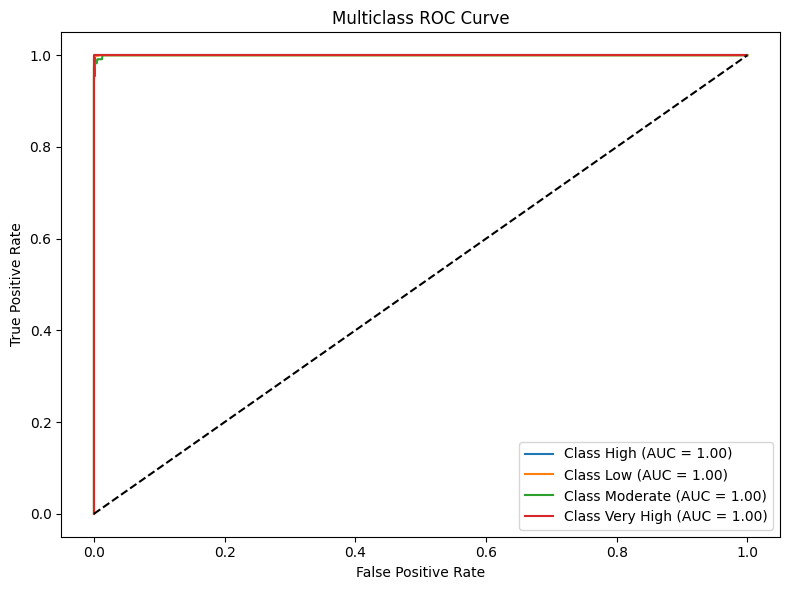

In [21]:
# Multiclass ROC Curve


# Binarize the output for multiclass ROC
classes = sorted(y.unique())
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Split and scale data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit OneVsRestClassifier
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for all classes
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


**🔷 17. Learning Curve**

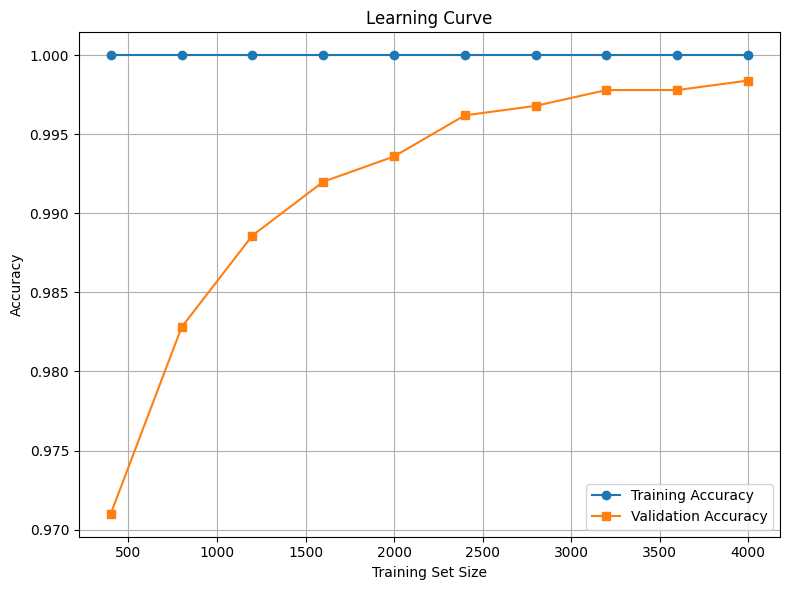

In [22]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Accuracy')
plt.plot(train_sizes, test_mean, marker='s', label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

**🔷 18. Predict New Data**

In [32]:
# User input
temp = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
precip = float(input("Enter Precipitation (mm): "))
soil_moisture = float(input("Enter Soil Moisture (%): "))
elevation = float(input("Enter Elevation (m): "))

# Exact feature names used during training
feature_names = ['Temperature_C', 'Humidity_', 'Precipitation_mm', 'Soil_Moisture_', 'Elevation_m']

# Input DataFrame
new_data_df = pd.DataFrame([[temp, humidity, precip, soil_moisture, elevation]], columns=feature_names)

# Scale the input
new_data_scaled = scaler.transform(new_data_df)

# Predict
prediction = model.predict(new_data_scaled)

# Class names mapping (if needed)
class_names = {
    "No": "No Risk of landslide",
    "Low": "Low Risk of landslide",
    "Moderate": "Moderate Risk of landslide",
    "High": "High Risk of landslide1"
}

# Print result
print("Predicted Landslide Risk Level:", class_names.get(prediction[0], prediction[0]))

Enter Temperature (°C): 34
Enter Humidity (%): 45
Enter Precipitation (mm): 56
Enter Soil Moisture (%): 80
Enter Elevation (m): 1450
Predicted Landslide Risk Level: Low Risk of landslide


**🔷 19.Model Comparison Random forest Vs SVM Vs Logistic Regression**

In [26]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
# Use X_train and y_train from the 75/25 split (defined in step 8)
# These variables were overwritten by the split in step 16, so we need to ensure we are using the correct ones.
# Since the original code had these lines after the ROC curve calculation (step 16),
# the variables X_train and y_train were referring to the split with test_size=0.3.
# To fix this, we should use the X_train and y_train from the first split (test_size=0.25).
# A simple fix is to re-run the split or ensure the variables are not overwritten if the ROC split is necessary later.
# Assuming the intention is to use the 75/25 split for model comparison:

# Re-perform the train-test split with the desired 75/25 ratio
# This ensures X_train and y_train have the correct number of samples (3750 each)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest F1 Score:", f1_score(y_test, rf_pred, average='macro'))

# Train and evaluate SVM
svc_model = SVC()
svc_model.fit(X_train, y_train) # Use the correct X_train and y_train
svc_pred = svc_model.predict(X_test) # Use the correct X_test
print("SVM Accuracy:", accuracy_score(y_test, svc_pred))
print("SVM F1 Score:", f1_score(y_test, svc_pred, average='macro'))

# Train and evaluate Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train) # Use the correct X_train and y_train
log_pred = log_model.predict(X_test) # Use the correct X_test
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Logistic Regression F1 Score:", f1_score(y_test, log_pred, average='macro'))

Random Forest Accuracy: 0.9976
Random Forest F1 Score: 0.9893272270643152
SVM Accuracy: 0.96
SVM F1 Score: 0.5979563049456997
Logistic Regression Accuracy: 0.924
Logistic Regression F1 Score: 0.4985292485102324


**🔷 20. Save Trained Model**

In [25]:
joblib.dump(model, 'landslide_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**🔷 21. Conclusion**

In this project, a machine learning pipeline was developed to classify landslide risk using 20 years of geospatial and environmental data. The model was trained on key features such as temperature, humidity, precipitation, soil moisture, and elevation.

Random Forest emerged as the most accurate classifier when compared to SVM and Logistic Regression. Important predictors identified include precipitation and soil moisture, both of which directly affect slope stability.

The ROC curve provided a visual assessment of model performance across all risk categories, further supporting its reliability.

The project successfully demonstrates that machine learning can play a vital role in landslide risk prediction, potentially aiding disaster response teams and urban planners in high-risk areas. Future improvements could include satellite image integration and real-time prediction deployment using tools like Streamlit or mobile apps.